In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
df1=pd.read_csv("D:\DataScience\VishwaniketanDSWorkshop2016-master\K-meansGD\girls_train.csv",names=['Age','Ht','X','Y'],header=0);
df1.head()
df1.drop('X',axis='columns', inplace=True);
df1.head()
df1.drop('Y',axis='columns', inplace=True);
df1.head()

,Age,Ht
0,2.04,0.877492
1,2.21,0.871571
2,2.38,0.948997
3,2.46,0.895848
4,2.54,0.951908


In [20]:

np.ones((5,), dtype=np.int)

array([1, 1, 1, 1, 1])

In [21]:
df1.insert(0,'Ones',1) # add the column of 1 at the start of the dataframe



In [23]:
df1.head()



,Ones,Age,Ht
0,1,2.04,0.877492
1,1,2.21,0.871571
2,1,2.38,0.948997
3,1,2.46,0.895848
4,1,2.54,0.951908


In [31]:
cols = df1.shape[1] 
cols 

3

In [26]:
X = df1.iloc[:,0:cols-1]  
X.head()

,Ones,Age
0,1,2.04
1,1,2.21
2,1,2.38
3,1,2.46
4,1,2.54


In [27]:
y = df1.iloc[:,cols-1:cols] 
y.head()

,Ht
0,0.877492
1,0.871571
2,0.948997
3,0.895848
4,0.951908


In [32]:
X = np.matrix(X.values)  #convert data frames to matrix for further calculation
y = np.matrix(y.values)  
theta = np.matrix(np.array([0,0])) 


In [33]:
theta

matrix([[0, 0]])

In [34]:
def computeCost(X, y, theta):  
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [35]:
cost=computeCost(X, y, theta) 
cost

0.59825135485648828

In [36]:
def gradientDescent(X, y, theta, alpha, iters):  
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost

In [37]:
alpha = 0.01  
iters = 1000

In [38]:
g, cost = gradientDescent(X, y, theta, alpha, iters)

In [39]:
g

matrix([[ 0.49180604,  0.11091406]])

In [41]:
cost[999]

0.0055019089115153656

In [42]:
cost[499]

0.011788624330395632

In [43]:
cost[0]

0.30667648235705214

In [44]:
parameters = int(theta.ravel().shape[1])

In [45]:
parameters

2

In [46]:
parameters = int(theta.ravel().shape[0])

In [47]:
parameters

1

In [49]:
parameters = (theta.ravel().shape)

In [50]:
parameters

(1, 2)

In [51]:
x = np.linspace(df1.Age.min(), df1.Age.max(), 100)  
 

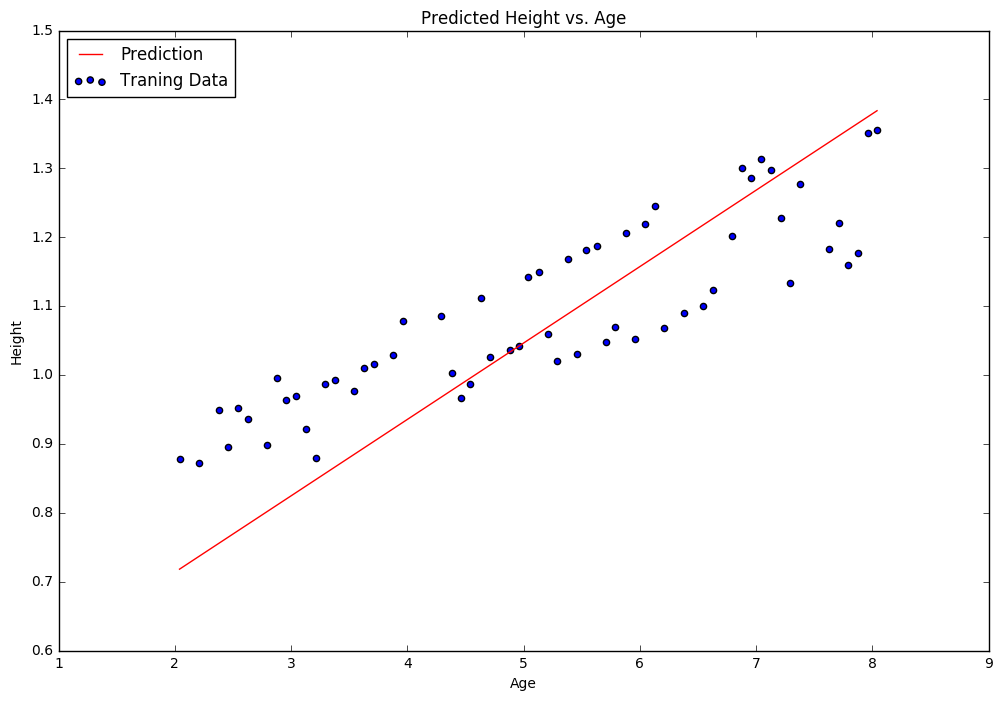

In [53]:
%matplotlib inline
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(df1.Age, df1.Ht, label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('Age')  
ax.set_ylabel('Height')  
ax.set_title('Predicted Height vs. Age') 